Load the dataset

In [2]:
import pandas as pd

# Load the synthetic dataset without header
data = pd.read_csv('Stars.csv', sep=',', decimal='.')

print(data.head())

# Standarize Temperature, L, R, A_M columns

data['Temperature'] = (data['Temperature'] - data['Temperature'].mean()) / data['Temperature'].std()
data['L'] = (data['L'] - data['L'].mean()) / data['L'].std()
data['R'] = (data['R'] - data['R'].mean()) / data['R'].std()
data['A_M'] = (data['A_M'] - data['A_M'].mean()) / data['A_M'].std()


# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns


# One-hot encode categorical features
data = pd.get_dummies(data, columns=categorical_columns)
# Convert boolean values to integers (1 for True, 0 for False)
data = data.astype(int)

#print size of data
print(data.shape)

# Extract features
X = data.iloc[:, :-1]

# Get unique class labels
classes = data['Type'].unique()

   Temperature         L       R    A_M Color Spectral_Class  Type
0         3068  0.002400  0.1700  16.12   Red              M     0
1         3042  0.000500  0.1542  16.60   Red              M     0
2         2600  0.000300  0.1020  18.70   Red              M     0
3         2800  0.000200  0.1600  16.65   Red              M     0
4         1939  0.000138  0.1030  20.06   Red              M     0
(240, 29)


# PCA

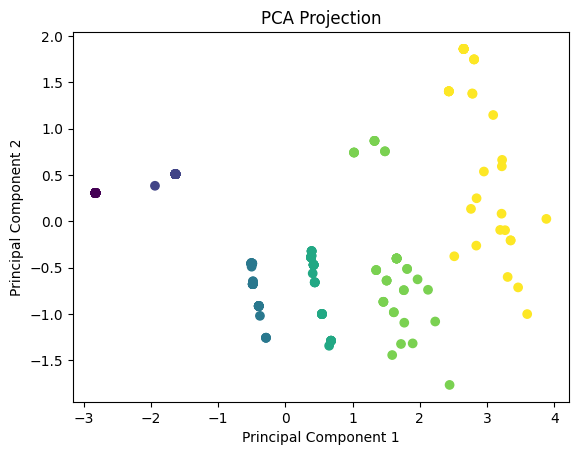

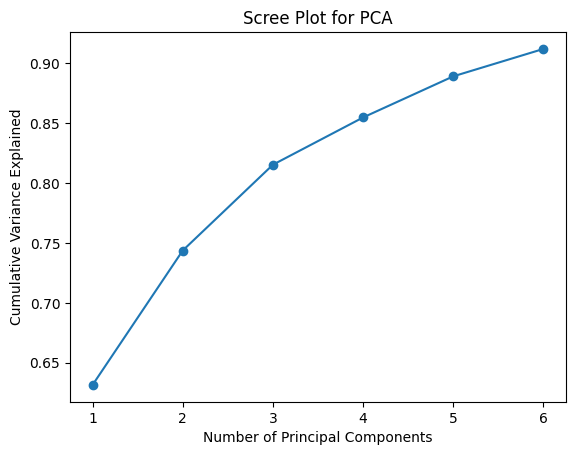

In [3]:
# Apply PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

# Apply PCA
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X)

# Plot PCA Projection
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Type'], cmap='viridis')

# Legend
legend_labels = {cls: f"Class {cls}" for cls in classes}
#legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
#                             markerfacecolor=color, markersize=10) 
#                  for color, label in zip(scatter.cmap(scatter.norm(classes)), legend_labels.values())]

# Add legend
#plt.legend(handles=legend_handles, title='Classes')

plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot Scree Plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

# t-SNE

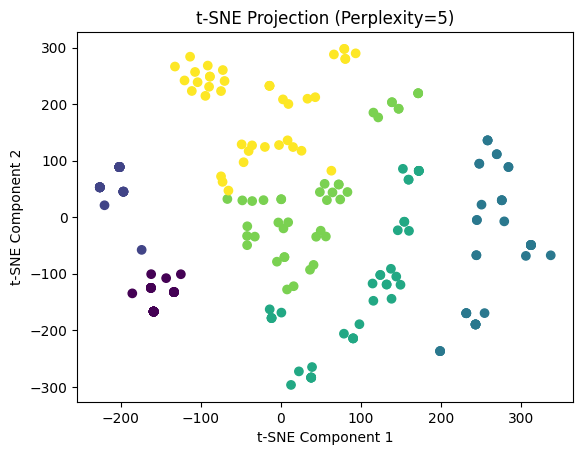

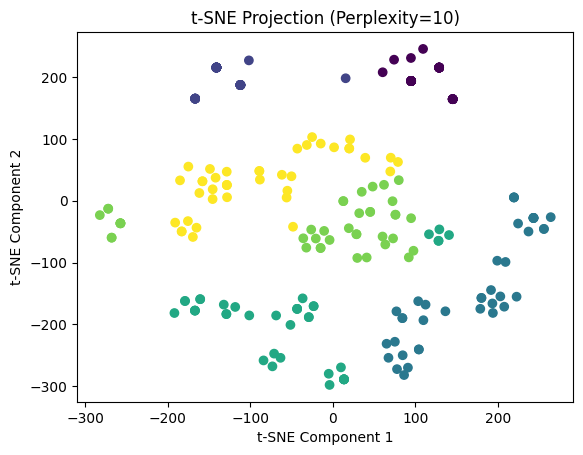

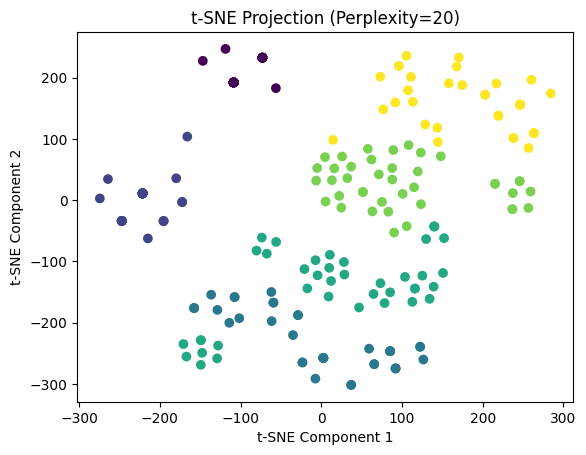

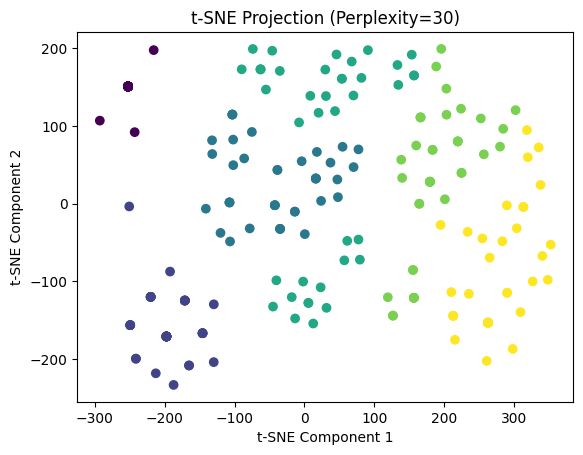

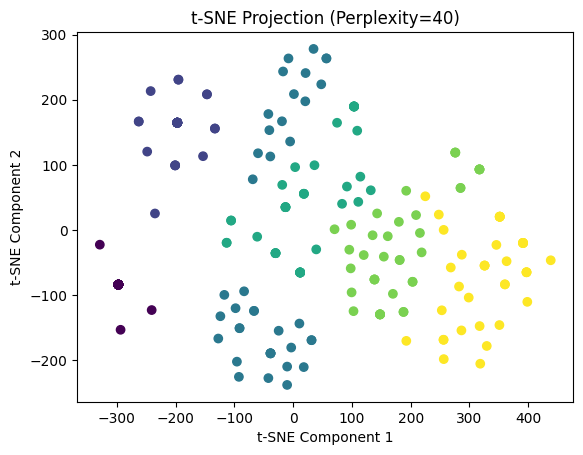

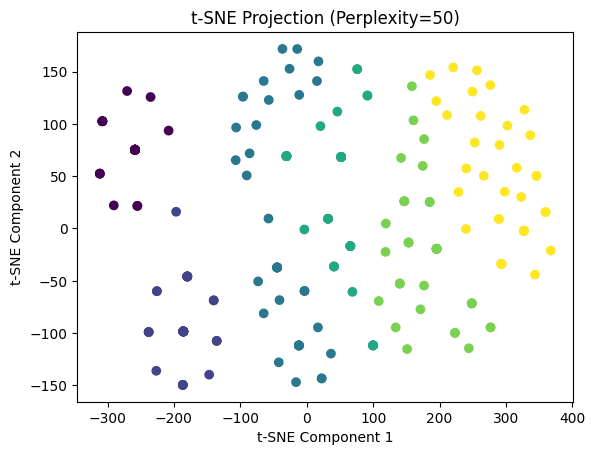

In [4]:
# Apply t-SNE with different perplexity values
from sklearn.manifold import TSNE

# Define perplexity values to try
perplexities = [5, 10, 20, 30, 40, 50]

# Plot t-SNE Projection for each perplexity
for perplexity in perplexities:
    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_result = tsne.fit_transform(X)

    # Plot t-SNE Projection
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=data['Type'], cmap='viridis')

        # Legend
    legend_labels = {cls: f"Class {cls}" for cls in classes}
    #legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
    #                            markerfacecolor=color, markersize=10) 
    #                for color, label in zip(scatter.cmap(scatter.norm(classes)), legend_labels.values())]

    # Add legend
    #plt.legend(handles=legend_handles, title='Classes')

    plt.title(f't-SNE Projection (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# k-means

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


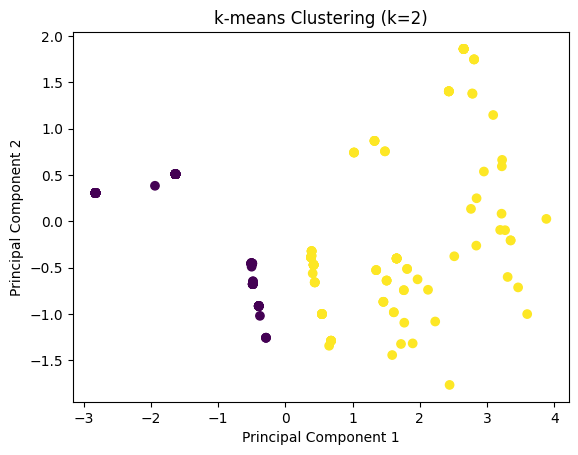

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


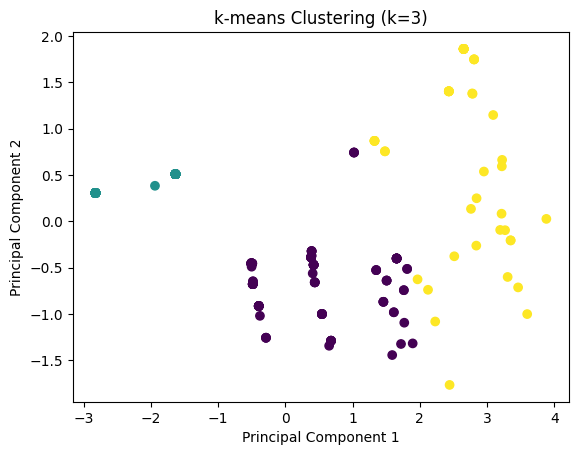

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


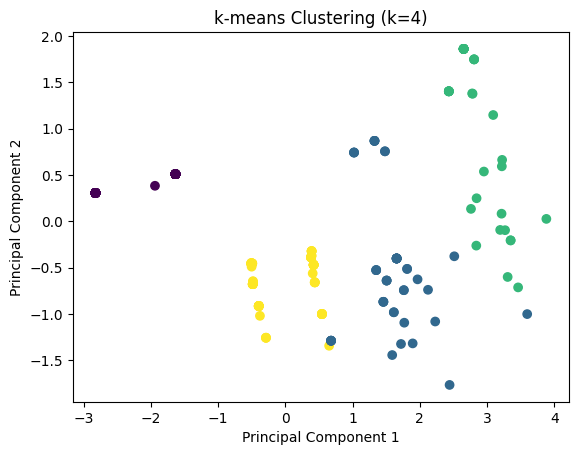

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


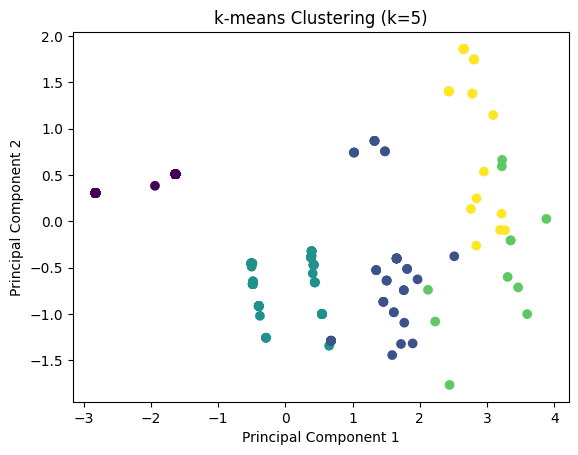

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


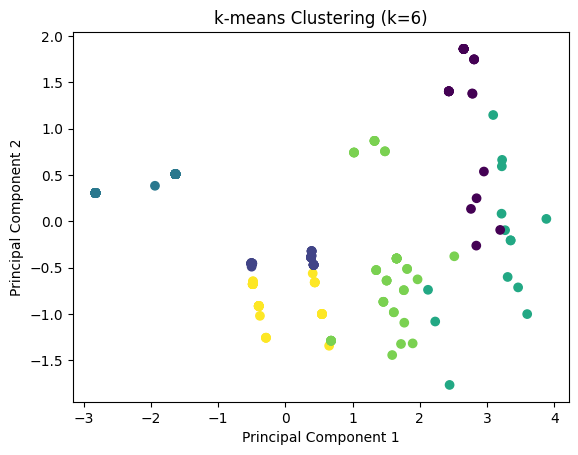

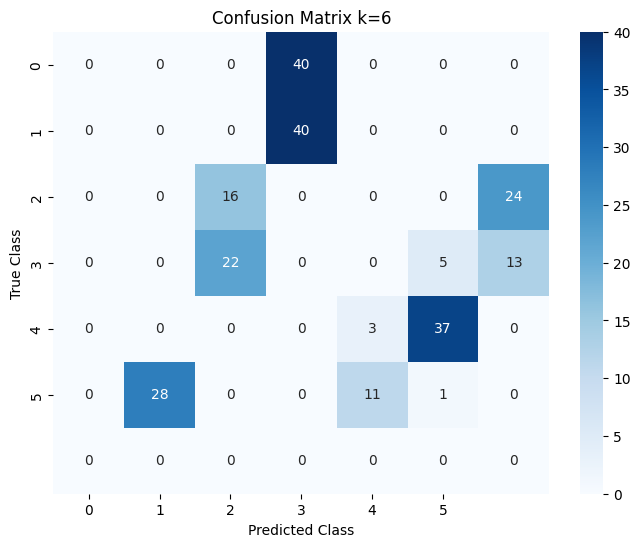

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define values of k to try
k_values = [2, 3, 4, 5, 6]

# Plot k-means Clustering for each value of k
for k in k_values:
    # Apply k-means
    kmeans = KMeans(n_clusters=k)
    kmeans_result = kmeans.fit_predict(X)

    # Plot k-means Clusters
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_result, cmap='viridis')
    plt.title(f'k-means Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    # Plot confusion matrix for k = 6
    if k == 6:
        # Add 1 to predicted classes to align with true classes
        kmeans_result += 1
        confusion_mat = confusion_matrix(data['Type'], kmeans_result)
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data['Type'].unique(), yticklabels=data['Type'].unique())
        plt.title(f'Confusion Matrix k=6')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

# AHC

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


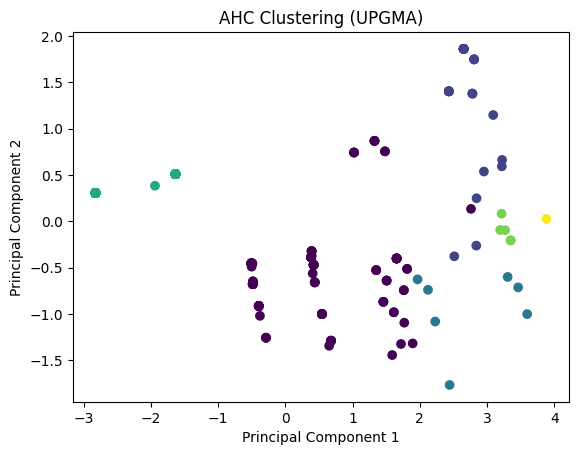

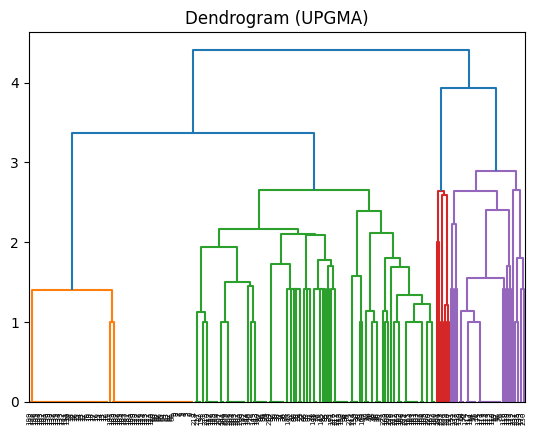

c:\Users\joanf\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


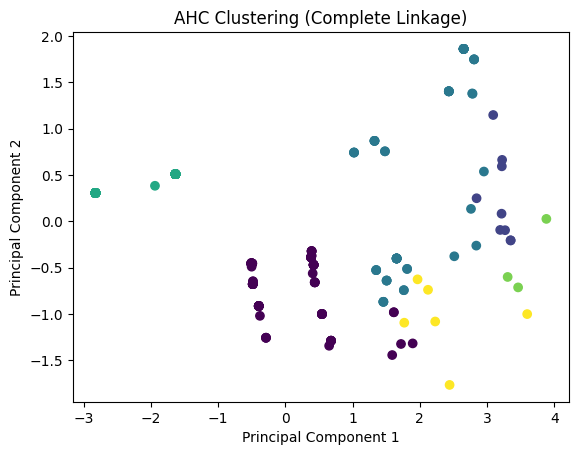

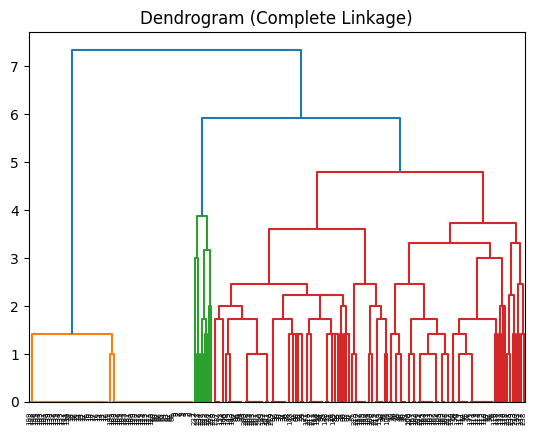

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# Calculate Euclidean distances
distances = pdist(X, metric='euclidean')

# Apply AHC with UPGMA method
ahc_upgma = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='euclidean')
ahc_upgma_result = ahc_upgma.fit_predict(X)

# Plot AHC Clusters (UPGMA)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ahc_upgma_result, cmap='viridis')
plt.title('AHC Clustering (UPGMA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot Dendrogram (UPGMA)
linkage_matrix_upgma = linkage(distances, method='average')
dendrogram(linkage_matrix_upgma)
plt.title('Dendrogram (UPGMA)')
plt.show()

# Apply AHC with Complete Linkage method
ahc_complete = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean')
ahc_complete_result = ahc_complete.fit_predict(X)

# Plot AHC Clusters (Complete Linkage)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ahc_complete_result, cmap='viridis')
plt.title('AHC Clustering (Complete Linkage)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot Dendrogram (Complete Linkage)
linkage_matrix_complete = linkage(distances, method='complete')
dendrogram(linkage_matrix_complete)
plt.title('Dendrogram (Complete Linkage)')
plt.show()

# SOM

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.0003137348818128902


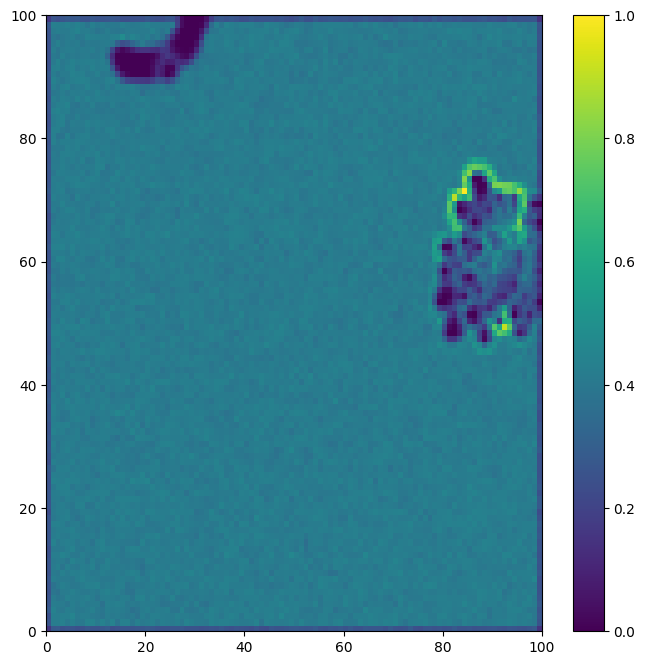

In [31]:
from minisom import MiniSom
import numpy as np

# Set the SOM parameters
som_shape = (100, 100)  # Grid shape of the SOM
input_len = X.shape[1]  # Number of features in the input data
sigma = 1  # Spread of the neighborhood function
learning_rate = 2  # Initial learning rate

# transform X to numpy array if it is not already
if not isinstance(X, np.ndarray):
    X = X.values

# Initialize the SOM
som = MiniSom(som_shape[0], som_shape[1], input_len, sigma=sigma, learning_rate=learning_rate, neighborhood_function='gaussian')

# Train the SOM
som.train_batch(X, 10000, verbose=True)  # You can adjust the number of iterations

# Create the U-matrix
umatrix = som.distance_map()

# Plot the U-matrix
plt.figure(figsize=(8, 8))
plt.pcolor(umatrix, cmap='viridis')
plt.colorbar()

# Show the plot
plt.show()


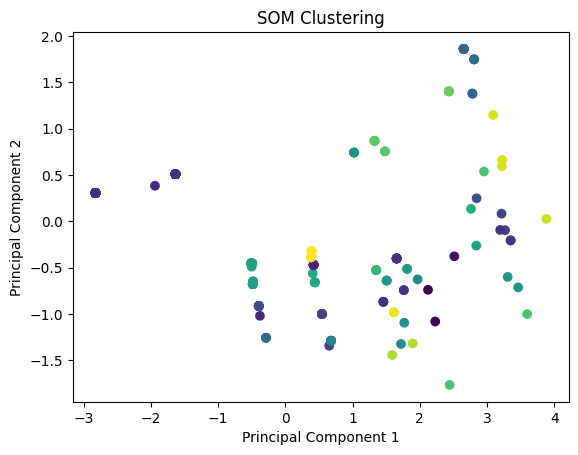

KeyError: 'class'

In [33]:
from sklearn_som.som import SOM

# Apply SOM
som = SOM(m=100, n=100, dim=6, max_iter=10000)
som.fit(pca_result)

# Plot SOM
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=som.predict(pca_result), cmap='viridis')
plt.title('SOM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
